In [ ]:
import sys
sys.path.append("../../OneFormer/")

In [1]:
from script.load_model import load_pytroch_model
from 

In [2]:
predictor = load_pytroch_model()

/home/liwa/miniconda3/envs/oneformer/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [47]:
image = movie[10,:,:,3]
image = image - image.min()
image = image / image.max()
image = (image * 255).astype(np.uint8)
im = np.stack((image,)*3, axis=-1)
predictions = predictor(im)

In [48]:
instances = predictions['instances']
pred_masks = instances.pred_masks
scores = instances.scores
pred_classes = instances.pred_classes
results = []
for box, score, label in zip(pred_masks, scores, pred_classes):
    print(label, score)
    # if score >= threshold:
        # if box[0,:].any() or box[-1, :].any():
        #     continue
        # if box[:, 0].any() or box[:, -1].any():
        #     continue
        # area = pred_masks.sum()
        # print(area)
        # if area < area_threshold:
        #     continue
        # polygon = to_cvat_polygon(np.array(box))

tensor(1, device='cuda:0') tensor(0.6820, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.6900, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.0110, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9336, device='cuda:0')
tensor(1, device='cuda:0') tensor(0.9587, device='cuda:0')


In [53]:
panoptic_seg, _ = predictions["panoptic_seg"]

In [50]:
import matplotlib.pyplot as plt

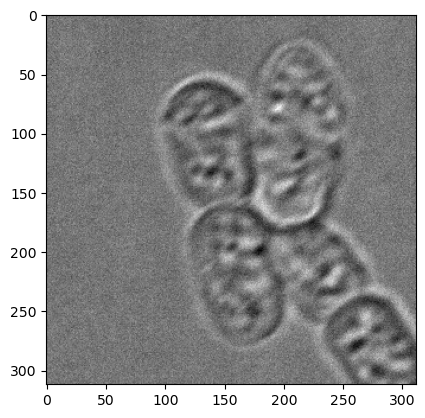

In [51]:
plt.imshow(im)

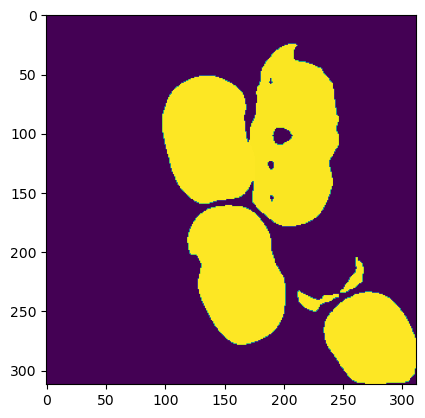

In [54]:
plt.imshow(panoptic_seg.cpu())

In [4]:
from skimage.io import imread, imsave
import numpy as np
from pathlib import Path

In [5]:
movie_path_list = list(Path("./data/").rglob("*.tif"))
movie_path_list

[PosixPath('data/20231025-timelapse_JCS0424_01-4ch-crop.tif')]

In [6]:
movie = imread(movie_path_list[0])

In [7]:
movie.shape

(37, 312, 312, 4)

In [18]:
import matplotlib.pyplot as plt

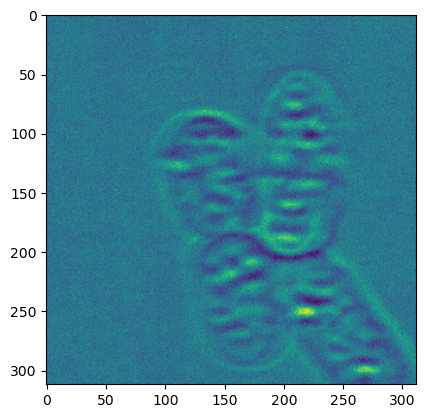

In [22]:
plt.imshow(movie[0,:,:,3])

In [10]:
for movie_path in movie_path_list:
    print(movie_path)
    movie = imread(movie_path)
    for frame in trange(0, movie.shape[0]):
        image = movie[frame,:,:,0]
        image = image - image.min()
        image = image / image.max()
        image = (image * 255).astype(np.uint8)
        im = np.stack((image,)*3, axis=-1)
        prediction_output = predictor(im)
        panoptic_seg, _ = prediction_output["panoptic_seg"]
        movie[frame,:,:,-1] = np.array(panoptic_seg)
    
    # imsave(movie_path, movie)
    movie = np.moveaxis(movie, -1, 1)
    imsave(movie_path, movie, imagej=True)

NameError: name 'movie_path_list' is not defined

In [60]:
from detectron2.utils.visualizer import Visualizer

In [61]:
panoptic_seg, segments_info = prediction_output["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)
cv2_imshow(out.get_image()[:, :, ::-1])

NameError: name 'MetadataCatalog' is not defined

In [62]:
import sys
sys.path.append("/home/liwa/project/deepYeast/deeplab/")

In [67]:
import tensorflow as tf
# tf.config.threading.set_intra_op_parallelism_threads(14)
import os
# os.environ["TF_ENABLE_ONEDNN_OPTS"] = '0'
import matplotlib.pyplot as plt
import numpy as np
import yaml
from tqdm import trange
from skimage.io import imread, imsave
from config_yml import ExperimentOptions
from trainer.train import DeepCellModule
from postprocess.post_process_utils import post_process_panoptic
from pathlib import Path
%load_ext autoreload
%autoreload 2

ModuleNotFoundError: No module named 'tensorflow'

In [64]:
### Update the model directory path according to your local setup. 
model_dir = "/home/liwa/data/deepyeast_model/v_1.0.0/checkpoint/"
num_gpus = 0

In [65]:
config_path = "/home/liwa/project/deepYeast/deeplab/configs/config_wl.yaml"
with open(config_path, 'r') as f:
    config = yaml.load(f, Loader=yaml.FullLoader)
configs = ExperimentOptions(config)
cellmodel = DeepCellModule("test", configs, num_gpus, model_dir=model_dir)

NameError: name 'yaml' is not defined